In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Define the assets we'll analyze
assets = ['TSLA', 'BND', 'SPY']

# Define the time period
end_date = "2025-01-31"
start_date = "2015-01-01"


# Fetch the data
data = yf.download(assets, start=start_date, end=end_date)
print("\nData shape:", data.shape)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Data shape: (2535, 15)


In [3]:
# Display basic information about the dataset
print("\nData columns:")
print(data.columns.levels[0].tolist())
print("\nFirst few rows of Adj Close prices:")
print(data['Close'].head())


Data columns:
['Close', 'High', 'Low', 'Open', 'Volume']

First few rows of Adj Close prices:
Ticker            BND         SPY       TSLA
Date                                        
2015-01-02  62.387081  172.592880  14.620667
2015-01-05  62.568241  169.475922  14.006000
2015-01-06  62.749428  167.879608  14.085333
2015-01-07  62.787113  169.971558  14.063333
2015-01-08  62.689018  172.987701  14.041333


In [4]:
# Extract just the Adjusted Close prices for simplicity
prices = data['Close'].copy()

In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(prices.isna().sum())


Missing values in each column:
Ticker
BND     0
SPY     0
TSLA    0
dtype: int64


In [6]:
# Fill any missing values using forward fill method
if prices.isna().sum().any():
    prices = prices.fillna(method='ffill')
    print("Missing values filled using forward fill")

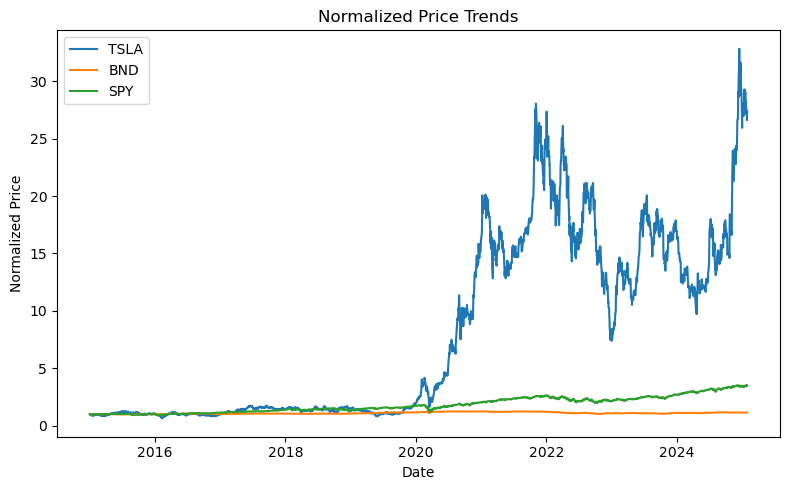

In [7]:
# EXPLORATORY DATA ANALYSIS
# Calculate daily returns
returns = prices.pct_change().dropna()

# Plot the price trends
plt.figure(figsize=(8, 5))
for asset in assets:
    plt.plot(prices.index, prices[asset]/prices[asset].iloc[0], label=asset)
plt.title('Normalized Price Trends')
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

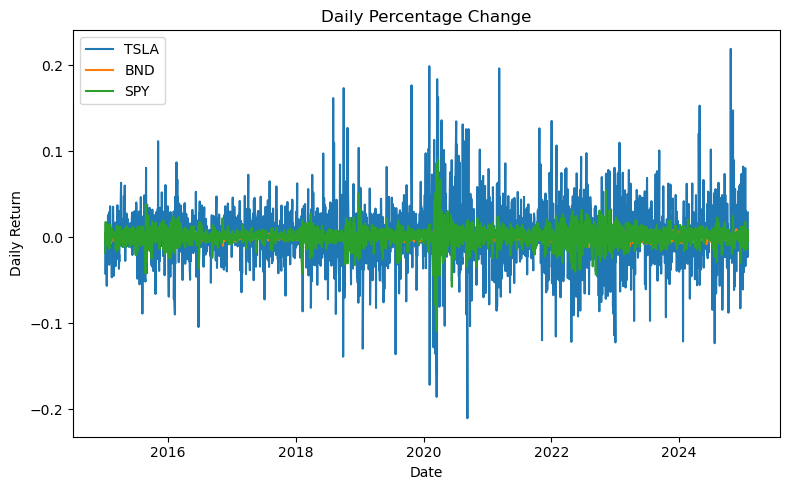

In [8]:
# Plote teh change percentage
plt.figure(figsize=(8,5))
for ticker in assets:
    plt.plot(returns.index, returns[ticker], label=ticker)
plt.title("Daily Percentage Change")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.tight_layout()

In [9]:
# Calculate and display key statistics
print("\nSummary statistics of daily returns:")
summary_stats = returns.describe().T
summary_stats['annualized_return'] = returns.mean() * 252
summary_stats['annualized_volatility'] = returns.std() * np.sqrt(252)
summary_stats['sharpe_ratio'] = summary_stats['annualized_return'] / summary_stats['annualized_volatility']
print(summary_stats[['annualized_return', 'annualized_volatility', 'sharpe_ratio']])



Summary statistics of daily returns:
        annualized_return  annualized_volatility  sharpe_ratio
Ticker                                                        
BND              0.015721               0.054400      0.288984
SPY              0.140314               0.175939      0.797518
TSLA             0.491944               0.571570      0.860690
